# Data Wrangling Class Project
Vicky, 11/28/2023

## Project Overview

The `AuctionDataAnalysis` class is tailored to dissect auction records of artworks cataloged in a CSV file. It executes an array of data preprocessing operations and generates visual representations to facilitate a comprehensive understanding of the dataset.

### Class Methods:
1. `__init__(file_path)`: Initializes the class with the specified dataset file path.
2. `preprocess_data()`: Preprocesses the dataset, including standardizing price formats and organizing movement orders.
3. `get_author_name()`: Retrieves the name of the report's author.
4. `get_record_num()`: Provides the count of auction records in the dataset.
5. `get_top_artists()`: Presents the total count of unique artists and lists the top ten contributing artists.
6. `get_top_titles()`: Displays the count of unique titles and highlights the most frequent five titles in the dataset.
7. `visualize_period_statistics()`: Generates a table detailing the Combined Price Statistics for Each Period (sorted in descending order by counts) and provides visual insights into Mean Price and Counts for Each Period.
8. `visualize_movement_statistics()`: Produces a table outlining the Combined Price Statistics for Each Movement (sorted in ascending order based on the historical timeline of movements) and showcases Mean Price and Counts for Each Movement.

### Additional Information:
The file includes an appendix explaining the Historical Timeline of Movements.

### Dataset Information:
The class is tested using the Sotheby's art price dataset from Kaggle.

Citation:
Fl.Kuhm. (2022). Art Price Dataset [Dataset]. Kaggle. DOI

The dataset comprises artworks and sculptures listed for sale on Sothebys, encompassing artist names, prices, associated time periods, and art movements.

## `Class AuctionDataAnalysis`: 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
class AuctionDataAnalysis:
    def __init__(self, file_path):
        self.data = pd.read_csv(file_path)
        self.processed_data = None
        self.record_num = None 
        self.author = 'Vicky'
        
    def preprocess_data(self):
        print("\033[1mSummary of the Dataset\033[0m\n")
        
        movement_order = [
            'Baroque', 'Romanticism', 'Realism', 'Impressionism', 'Traditional',
            'Post-Impressionism', 'Art Nouveau', 'Expressionism', 'Cubism', 'Abstract',
            'Modernism', 'Geometric Abstraction', 'Surrealism', 'Art Deco', 'Magic Realism ',
            'Organic/Biomorphic Abstraction', 'Social Realism', 'Abstract Expressionism',
            'Art Brut', 'Pop Art', 'Minimalism', 'Nouveau Réalisme', 'Environmental Art',
            'Street Art', 'Conceptual ', 'Feminist Art ', 'Photorealism', 'Post-Minimalism',
            'Performance Art', 'Neo-Expressionism', 'Punk, Young British Artists, Abstract',
            'Punk', 'Neogeo'
        ]
        
        self.processed_data = self.data.iloc[:, [1, 2, 3, 4, 7, 8]]
        self.processed_data.loc[:, 'price'] = self.processed_data['price'].str.split().str[0]
        self.processed_data.loc[:, 'price'] = self.processed_data['price'].astype(float)
        self.processed_data.loc[self.processed_data['price'] < 100, 'price'] *= 1000
        self.processed_data.dropna(subset=['artist'], inplace=True)
        
        self.processed_data.loc[:, 'movement'] = pd.Categorical(
            self.processed_data['movement'],
            categories=movement_order,
            ordered=True
        )
        
        self.record_num = self.record_num = len(self.processed_data)
       
    def get_author_name(self):
        return self.author
    
    def get_record_num(self):
        return self.record_num
        
    def get_top_artists(self):
        artist_num = self.processed_data['artist'].nunique()
        print(f"2. There are records attributed to {artist_num} different artists. Notably, among these, the following ten artists have contributed the most artworks:\n")
        artist_counts = self.processed_data['artist'].value_counts()
        return artist_counts.head(10)
    
    def get_top_titles(self):
        title_num = self.processed_data['title'].nunique()
        print(f"3. This dataset contains {title_num} unique titles. Among these, the top five titles have the highest frequency of artworks:\n")
        title_counts = self.processed_data['title'].value_counts()
        return title_counts.head(5)
    
    def visualize_period_statistics(self):
        if self.processed_data is None:
            print("No data available. Preprocess the data first.")
            return

        period_counts = self.processed_data['period'].value_counts()
        mean_price_period = self.processed_data.groupby('period')['price'].mean().round(2)
        median_price_period = self.processed_data.groupby('period')['price'].median()
        max_price_period = self.processed_data.groupby('period')['price'].max()
        min_price_period = self.processed_data.groupby('period')['price'].min()
        sd_price_period = self.processed_data.groupby('period')['price'].std().round(2)

        combined_stats_period = pd.concat([period_counts, mean_price_period, median_price_period, max_price_period, min_price_period, sd_price_period], axis=1)
        combined_stats_period.columns = ['Counts', 'Mean Price', 'Median Price', 'Max Price', 'Min Price', 'Standard Deviation']
        
        pd.set_option('display.width', 1000)
        pd.set_option('display.max_colwidth', None)

        print("4. Combined Price Statistics for Each Period: (sorted in descending order by counts)")
        print(combined_stats_period)
        
        period_mean_price = combined_stats_period['Mean Price'].sort_values()
        period_counts = combined_stats_period['Counts'].reindex(period_mean_price.index)

        fig, ax1 = plt.subplots(figsize=(10, 6))

        ax1.bar(range(len(period_mean_price)), period_mean_price, color='tan', label='Mean Price')
        ax1.set_xlabel('Period')
        ax1.set_ylabel('Mean Price', color='sienna')
        ax1.tick_params(axis='y', labelcolor='sienna') 

        ax2 = ax1.twinx()  
        ax2.plot(range(len(period_counts)), period_counts, marker='o', linestyle='-', color='brown', label='Counts')
        ax2.set_ylabel('Counts', color='brown')
        ax2.tick_params(axis='y', labelcolor='brown')  

        plt.title('Mean Price and Counts for Each Period')
        ax1.legend(loc='upper left') 
        ax2.legend(loc='upper right') 

        ax1.set_xticks(range(len(period_mean_price)))
        ax1.set_xticklabels(period_mean_price.index, rotation=45, ha='right')

        plt.show()
        
    def visualize_movement_statistics(self):
        if self.processed_data is None:
            print("No data available. Preprocess the data first.")
            return

        movement_counts = self.processed_data['movement'].value_counts()
        mean_price_movement = self.processed_data.groupby('movement')['price'].mean().round(2)
        median_price_movement = self.processed_data.groupby('movement')['price'].median()
        max_price_movement = self.processed_data.groupby('movement')['price'].max()
        min_price_movement = self.processed_data.groupby('movement')['price'].min()
        sd_price_movement = self.processed_data.groupby('movement')['price'].std().round(2)

        combined_stats_movement = pd.concat([movement_counts, mean_price_movement, median_price_movement, max_price_movement, min_price_movement, sd_price_movement], axis=1)
        combined_stats_movement.columns = ['Counts', 'Mean Price', 'Median Price', 'Max Price', 'Min Price', 'Standard Deviation']
        
        print("5. Combined Price Statistics for Each Movement: (sorted in ascending order based on the historical timeline of movements)")
        print(combined_stats_movement)

        movement_mean_price = combined_stats_movement['Mean Price'].sort_values()
        movement_counts = combined_stats_movement['Counts'].reindex(movement_mean_price.index)

        fig, ax1 = plt.subplots(figsize=(10, 6))

        ax1.bar(range(len(movement_mean_price)), movement_mean_price, color='tan', label='Mean Price')
        ax1.set_xlabel('Movement')
        ax1.set_ylabel('Mean Price', color='sienna')
        ax1.tick_params(axis='y', labelcolor='sienna') 

        ax2 = ax1.twinx()  
        ax2.plot(range(len(movement_counts)), movement_counts, marker='o', linestyle='-', color='brown', label='Counts')
        ax2.set_ylabel('Counts', color='brown')
        ax2.tick_params(axis='y', labelcolor='brown')  

        plt.title('Mean Price and Counts for Each Movement')
        ax1.legend(loc='upper left') 
        ax2.legend(loc='upper right') 

        ax1.set_xticks(range(len(movement_mean_price)))
        ax1.set_xticklabels(movement_mean_price.index, rotation=45, ha='right')

        plt.show()

## Test: 

Summary of the Dataset

Authored by Vicky

1. The dataset comprises 753 auction records of artworks.

2. There are records attributed to 454 different artists. Notably, among these, the following ten artists have contributed the most artworks:

Russell Young          17
John Fischer           15
Ruth Bernhard          13
Donald Sultan           9
Grant Hacking           8
Richard Bernstein       8
Ed  Ruscha              8
Cindy  Sherman          7
Robert Indiana          7
Kim Gottlieb Walker     7
Name: artist, dtype: int64

3. This dataset contains 678 unique titles. Among these, the top five titles have the highest frequency of artworks:

Untitled                             35
Untitled                             10
Madame de Pompadour (née Poisson)     7
Rays                                  5
Fragments Of Hope                     5
Name: title, dtype: int64

4. Combined Price Statistics for Each Period: (sorted in descending order by counts)
              Counts  Mean Price  Med

/opt/jupyterhub/lib/python3.8/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/opt/jupyterhub/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/jupyterhub/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

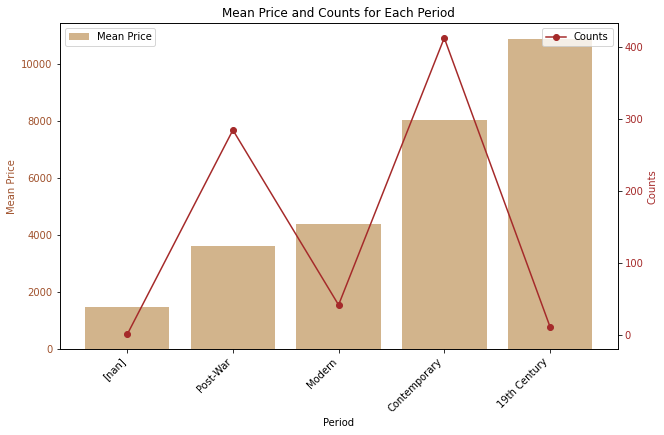

5. Combined Price Statistics for Each Movement: (sorted in ascending order based on the historical timeline of movements)
                                       Counts  Mean Price  Median Price  Max Price  Min Price  Standard Deviation
Baroque                                     1    28500.00       28500.0    28500.0    28500.0                 NaN
Romanticism                                 2     2250.00        2250.0     2500.0     2000.0              353.55
Realism                                   176     5647.19        3000.0    50000.0      600.0             7802.75
Impressionism                              20     5306.50        2027.5    37000.0      800.0             8554.51
Traditional                                 5     3620.00        1500.0    12000.0      800.0             4769.91
Post-Impressionism                          4     8500.00        6750.0    15500.0     5000.0             4949.75
Art Nouveau                                 1     2250.00        2250.0     2250

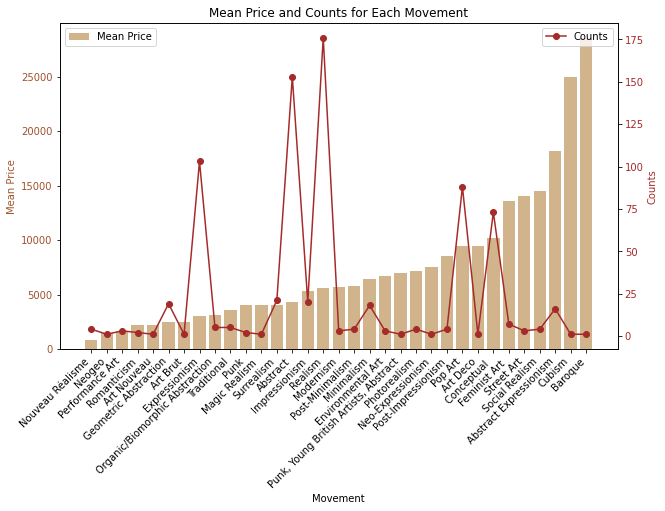

In [11]:
file_path = 'ClassProj/artDataset.csv'
art_analysis = AuctionDataAnalysis(file_path)
art_analysis.preprocess_data()

author_name = art_analysis.get_author_name()
print(f"Authored by {author_name}\n")

record_num = art_analysis.get_record_num()
print(f"1. The dataset comprises {record_num} auction records of artworks.\n")

top_artists = art_analysis.get_top_artists()
print(f'{top_artists}\n')
top_titles = art_analysis.get_top_titles()
print(f'{top_titles}\n')

art_analysis.visualize_period_statistics()

art_analysis.visualize_movement_statistics()

## Appendix1: Historical Timeline of Movements

1. Baroque: 17th - first half of the 18th century
2. Romanticism: 1805 - 1830s
3. Realism: 1840 - the late nineteenth century
4. Impressionism: 1867 - 1886
5. Traditional: 1880 - 1900
6. Post-Impressionism: 1886 - 1905
7. Art Nouveau: 1890 - 1910
8. Expressionism: approximately 1905 - 1920
9. Cubism: 1907 - 1914
10. Abstract: early 20th century
11. Modernism: early 1900s - the early 1940s
12. Geometric Abstraction: 1910 - 1960
13. Surrealism: late 1910s - early 1920s
14. Art Deco: 1919 - 1939 
15. Magic Realism: 1920s - 1940s
16. Organic/Biomorphic Abstraction: 1930s/40s
17. Social Realism: 1930s
18. Abstract Expressionism: 1943 - the mid-1950s
19. Art Brut: 1945
20. Pop Art: 1950s - 1960s 
21. Minimalism: 1960s - 1970s 
22. Nouveau Réalisme: 1960s
23. Environmental Art: 1960s
24. Street Art: 1960s - 1980s
25. Conceptual: mid-1960s - the mid-1970s
26. Feminist Art: late 1960s
27. Photorealism: late 1960s
28. Post-Minimalism: late 1960s - early 1970s 
29. Performance Art: 1970s
30. Neo-Expressionism: late 1970s and 1980s
31. Punk, Young British Artists, Abstract: 1975 – 1980
32. Punk: 1975 – 1980
33. Neogeo: 1990s
34. [nan]